In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
tf.keras.utils.set_random_seed(12)

batch_size = 32
img_height = img_width =224
directory = "../Untitled Folder 4/dataset/data/train"
test = "../Untitled Folder 4/dataset/data/test"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1910 files belonging to 2 classes.
Using 1624 files for training.


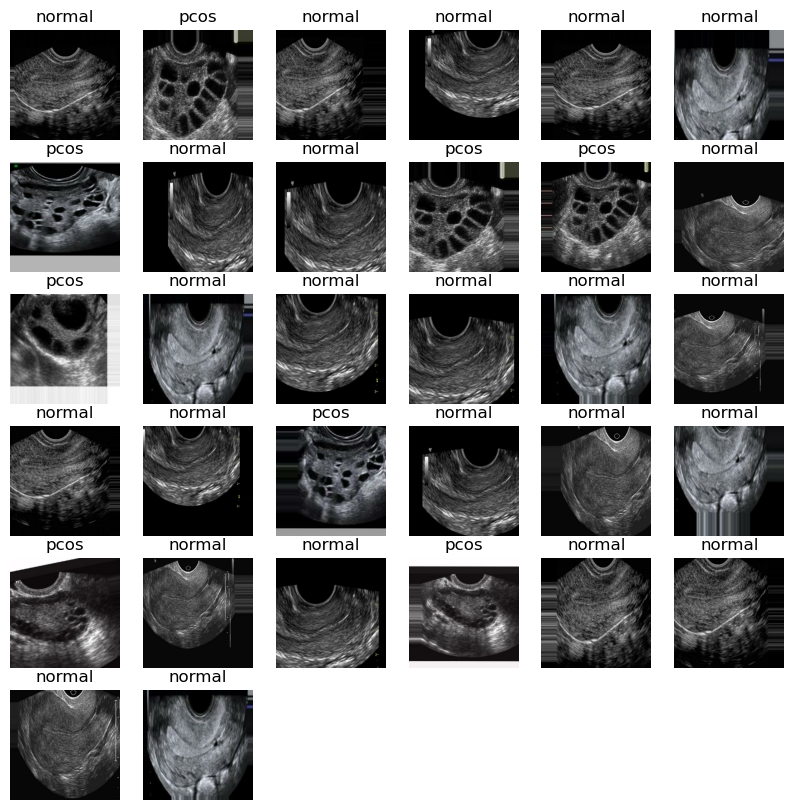

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [5]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=20,
                             validation_split=0.2,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_ds = datagen.flow_from_directory(directory, 
                                       class_mode='categorical',
                                       classes=['pcos', 'normal'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='training',
                                       seed=12)
# prepare an iterators for each dataset
val_ds = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['pcos', 'normal'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='validation',
                                       seed=12)

Found 1529 images belonging to 2 classes.
Found 381 images belonging to 2 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1909 files belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(12, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(8, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(4, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(2,activation='softmax'))

opt=Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1,patience=15)

In [8]:
history = model.fit( 
    train_ds,
    validation_data=val_ds,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    verbose=1,
    epochs=10)


Epoch 1/10


C:\Users\prakr\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7067 - loss: 0.6580 - val_accuracy: 0.8058 - val_loss: 0.5207
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 959ms/step - accuracy: 0.8028 - loss: 0.4816 - val_accuracy: 0.9055 - val_loss: 0.2771
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9593 - loss: 0.1311 - val_accuracy: 0.9895 - val_loss: 0.0267
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 52s 983ms/step - accuracy: 0.9865 - loss: 0.0466 - val_accuracy: 0.9711 - val_loss: 0.0619
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9775 - loss: 0.0493 - val_accuracy: 0.9921 - val_loss: 0.0360
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9951 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 960ms/step - accuracy: 0.9953 - loss: 0.0111 - val_accuracy: 0.9974 - val_loss: 0.0072
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9965 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 12)        │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 8)         │           2,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 4)           │             804 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           6,274 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,196 (121.86 KB)

 Trainable params: 10,398 (40.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,798 (81.25 KB)

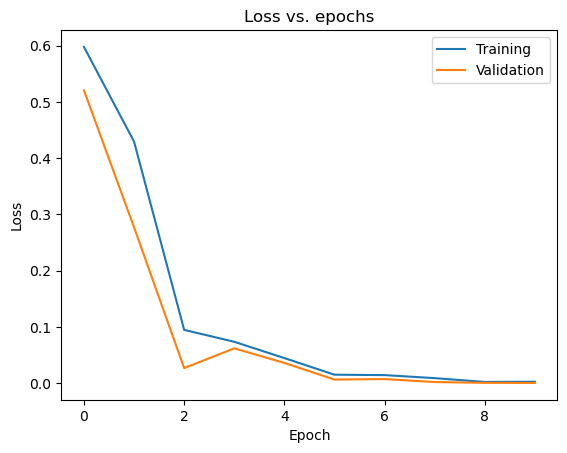

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

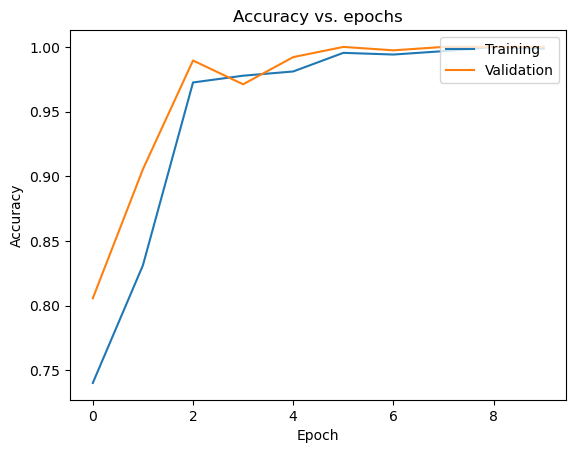

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
accuracy_score = model.evaluate(val_ds)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 708ms/step - accuracy: 1.0000 - loss: 6.8789e-04
[0.000914137635845691, 1.0]
Accuracy: 100.0000%
Loss:  0.000914137635845691


In [18]:
model.save('model1.h5')

Traceback (most recent call last):
  File "C:\Users\prakr\anaconda3\lib\site-packages\gradio\queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\prakr\anaconda3\lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\prakr\anaconda3\lib\site-packages\gradio\blocks.py", line 1928, in process_api
    result = await self.call_function(
  File "C:\Users\prakr\anaconda3\lib\site-packages\gradio\blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\prakr\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\prakr\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\prakr\anaconda3\lib\site-pac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [13]:
from keras.preprocessing.image import load_img
image = load_img
('../Untitled Folder 4/dataset/data/test/pcos/img_0_9997.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [14]:
l={"pcos":prediction[0][0],"normal":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
            return key
 
    return "key doesn't exist"

In [15]:
j=prediction.max()
get_key(j)

'pcos'

In [16]:
pip install gradio

In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('../Untitled Folder 4/model1.h5')

# Define the class names
class_names = ['pcos', 'normal']

def predict_image(image):
    # Resize the image to the expected input shape of the model
    image_resized = tf.image.resize(image, (224, 224))

    # Normalize the image to [0, 1] range
    image_resized = image_resized / 255.0

    # Expand dimensions to add batch size dimension
    image_resized = tf.expand_dims(image_resized, axis=0)

    # Make a prediction
    pred = model.predict(image_resized)

    # Get the index of the predicted class
    predicted_class_index = np.argmax(pred)

    # Get the name of the predicted class
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy", label="Upload an Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="PCOS Detection",
    description="Upload an image to find out if it is normal or pcos"
)

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
